## This is a MLFlow Demo for expermentation and tracking of different models for the same problem

#### Lets make a polynomial classifier for non-linear classification problem

In [1]:
# Load All Liberaries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from matplotlib.colors import ListedColormap
cm_bright = ListedColormap(['#FF0000', '#0000FF'])
cm = plt.cm.RdBu
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_val_score


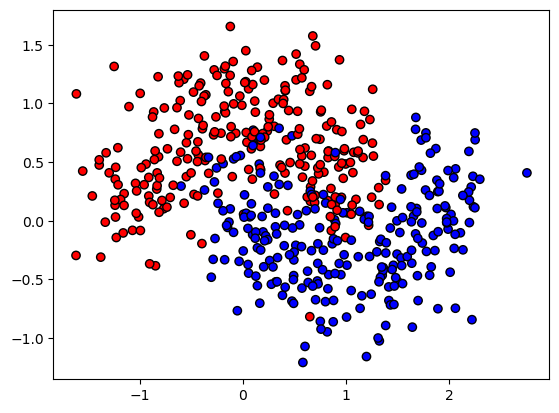

In [2]:
# Generating the data
X,y = make_moons(n_samples = 500, noise =0.3)
X_test,y_test = make_moons(n_samples = 1000, noise =.4)
plt.scatter( X[:,0], X[:,1],c=y,cmap=cm_bright, edgecolor='k')
plt.show()

In [3]:
# Create Multiple Pipelines for multiuple models
pipelines = []
pipelines.append(('LR' , (Pipeline([('scaled' , PolynomialFeatures(degree=3, include_bias=False)),('LR' ,LogisticRegression())]))))
pipelines.append(('KNN' , (Pipeline([('scaled' , PolynomialFeatures(degree=3, include_bias=False)),('KNN' ,KNeighborsClassifier())]))))
pipelines.append(('DT' , (Pipeline([('scaled' , PolynomialFeatures(degree=3, include_bias=False)),('DT' ,DecisionTreeClassifier())]))))
pipelines.append(('SVC' , (Pipeline([('scaled' , PolynomialFeatures(degree=3, include_bias=False)),('SVC' ,SVC())]))))
pipelines.append(('MNB' , (Pipeline([('scaled' , PolynomialFeatures(degree=3, include_bias=False)),('MNB' ,GaussianNB())]))))
print(pipelines)

[('LR', Pipeline(steps=[('scaled', PolynomialFeatures(degree=3, include_bias=False)),
                ('LR', LogisticRegression())])), ('KNN', Pipeline(steps=[('scaled', PolynomialFeatures(degree=3, include_bias=False)),
                ('KNN', KNeighborsClassifier())])), ('DT', Pipeline(steps=[('scaled', PolynomialFeatures(degree=3, include_bias=False)),
                ('DT', DecisionTreeClassifier())])), ('SVC', Pipeline(steps=[('scaled', PolynomialFeatures(degree=3, include_bias=False)),
                ('SVC', SVC())])), ('MNB', Pipeline(steps=[('scaled', PolynomialFeatures(degree=3, include_bias=False)),
                ('MNB', GaussianNB())]))]


In [4]:
# Run these multiple pipelines one by one
results = {}
for name, model in pipelines:
    # First to a cross validation
    scores_cv = cross_val_score(model, X, y, cv=5, scoring='accuracy')
    print(f"Model: {name} Mean: {np.round(scores_cv.mean(),3)} Std: {np.round(scores_cv.std(),3)}")
    # Now fit the model on the entire data and predict the test data
    model.fit(X,y)
    y_pred_train = model.predict(X)
    y_pred = model.predict(X_test)
    results[name] = {
        'CV Mean Accuracy': np.round(scores_cv.mean(),3),
        'CV Accuracy Std': np.round(scores_cv.std(),3),
        'Train Accuracy': np.round(np.mean(y_pred_train == y),3),
        'Test Accuracy': np.round(np.mean(y_pred == y_test),3)
    }


Model: LR Mean: 0.898 Std: 0.024
Model: KNN Mean: 0.894 Std: 0.008
Model: DT Mean: 0.87 Std: 0.028
Model: SVC Mean: 0.896 Std: 0.035
Model: MNB Mean: 0.814 Std: 0.046


### Now track the above models to MLFlow

In [7]:
import mlflow
mlflow.set_experiment('MLFlowDemo2')
mlflow.set_tracking_uri('http://127.0.0.1:5000')
for name, model in pipelines:
    with mlflow.start_run(run_name=name):
        for key, value in results[name].items():
            mlflow.log_metric(key, value)
        mlflow.sklearn.log_model(model, name)

2025/02/03 23:34:33 INFO mlflow.tracking.fluent: Experiment with name 'MLFlowDemo2' does not exist. Creating a new experiment.
2025/02/03 23:34:36 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run LR at: http://127.0.0.1:5000/#/experiments/660194066884321990/runs/b83db0252b2c4996980bcb40de124c1c
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/660194066884321990


2025/02/03 23:34:38 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run KNN at: http://127.0.0.1:5000/#/experiments/660194066884321990/runs/dc7a9a2fc184492a8b72825720a5a80a
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/660194066884321990


2025/02/03 23:34:41 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run DT at: http://127.0.0.1:5000/#/experiments/660194066884321990/runs/41b0071bba0c4f1db049f7f6bdcbd72f
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/660194066884321990


2025/02/03 23:34:43 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run SVC at: http://127.0.0.1:5000/#/experiments/660194066884321990/runs/539688de0f9b435ba66ac4d04fed2def
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/660194066884321990


2025/02/03 23:34:45 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run MNB at: http://127.0.0.1:5000/#/experiments/660194066884321990/runs/81251ba6e05249c098751dcbef26d2eb
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/660194066884321990
